In [184]:
import pandas as pd
import matplotlib.pyplot as plt

sales_df = pd.read_csv('fct_invoice.csv')
customer_df = pd.read_json('dim_customer.json')

In [185]:
sales_df.head(n=10)

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,349,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,158,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,2423,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,3208,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,1575,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


In [186]:
customer_df.head(n=10)

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
5,NaN,Thomas,M,5,Alexander
6,83.0,George,M,6,Ramirez
7,NaN,Julia,F,7,Robinson
8,23.0,Patricia,F,8,Rasmussen
9,25.0,Dean,M,9,Dillon


## Easy
#### 1. How many unique customers are in the dataset?

In [187]:
print("Number of unique customers:", sales_df['customer_id'].nunique())

Number of unique customers: 5191


#### 2. What are the different categories of products available? How many unique categories are there?

In [188]:
categories = sales_df['category'].unique()
print("Categories:", end=" ")
print(*categories, sep=", ")

number = sales_df['category'].nunique()
print("\nNumber of categories:", number)

Categories: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir

Number of categories: 8


#### 3. Which payment method is the most popular? How many times was it used?

In [189]:
count = sales_df['payment_method'].value_counts()

print("Most popular payment method:", count.index[0])
print("\nCount:", count.iloc[0])

Most popular payment method: Cash

Count: 44447


## Medium
#### 1. What are the three most popular categories, by total sales?

In [190]:
sales_df['sales'] = sales_df['price'] * sales_df['quantity']
category_sales = sales_df.groupby(['category'])['sales'].sum()
category_sales = category_sales.sort_values(ascending=False)

print("Top three most popular categories by total sales: \n")
print("1.", category_sales.index[0], "with {:,.2f} in total sales".format(category_sales.iloc[0]))
print("2.", category_sales.index[1], "with {:,.2f} in total sales".format(category_sales.iloc[1]))
print("3.", category_sales.index[2], "with {:,.2f} in total sales".format(category_sales.iloc[2]))

Top three most popular categories by total sales: 

1. Clothing with 113,996,791.04 in total sales
2. Shoes with 66,553,451.47 in total sales
3. Technology with 57,862,350.00 in total sales


#### 2. What are the total sales attributed to customers over the age of 45?

In [191]:
combined_df = pd.merge(sales_df, customer_df, how='left', left_on='customer_id', right_on='id')

print("Total sales attributed to customers over the age of 45:", "{:,.2f}".format(combined_df[combined_df['age'] > 45]['sales'].sum()))

Total sales attributed to customers over the age of 45: 82,039,768.15


#### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

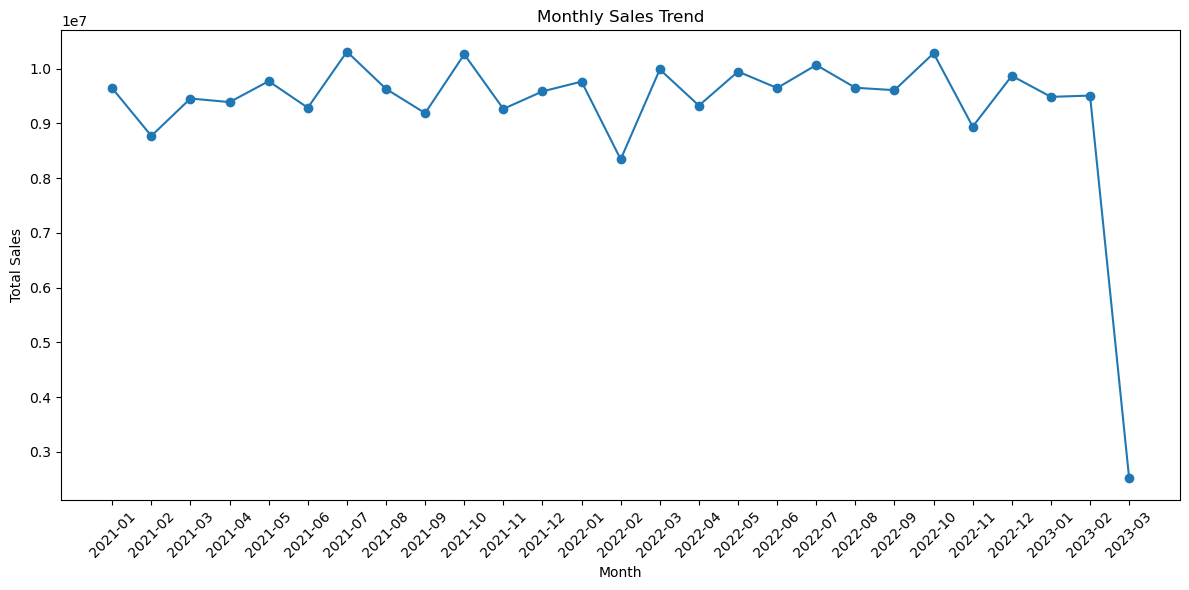

In [192]:
sales_df['invoice_date'] = pd.to_datetime(sales_df['invoice_date'], dayfirst=True)
sales_df['month'] = sales_df['invoice_date'].dt.to_period('M')
monthly_sales = sales_df.groupby('month')['sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The graph shows the total sales (calculated as price × quantity) for each month over time. Overall, sales remain relatively stable with no significant spikes or drops, indicating consistent performance across months. The only notable deviation is the sharp decline in the final month, which is likely due to incomplete or partial data.

## Hard
#### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [193]:
combined_df = pd.merge(sales_df, customer_df, how='left', left_on='customer_id', right_on='id')
combined_df = combined_df.dropna(subset=['age'])
combined_df['age'] = combined_df['age'].astype(int)

decade_bins = pd.cut(
    combined_df['age'],
    bins=range(10, 100, 10),
    right=False,
    labels=[f"{i}-{i+9}" for i in range(10, 90, 10)]
)

combined_df['decade_age'] = decade_bins

pivot = pd.pivot_table(
    combined_df,
    index='category',
    columns='decade_age',
    values='sales',
    aggfunc='sum',
    fill_value=0,
    observed=False
)

pivot['Total'] = pivot.sum(axis=1)
pivot.loc['Total'] = pivot.sum(axis=0)
pivot.style.format("{:,.2f}")

decade_age,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,Total
category,,,,,,,,,
Books,"12,801.75","79,461.75","84,143.10","87,203.40","74,962.20","80,476.80","54,827.85","26,664.00","500,540.85"
Clothing,"1,927,413.84","10,250,732.80","11,354,126.96","11,215,189.92","10,321,851.76","10,660,642.08","7,769,371.28","4,493,698.00","67,993,026.64"
Cosmetics,"109,619.36","605,915.32","723,544.70","665,034.96","587,780.96","649,990.76","419,082.62","254,531.60","4,015,500.28"
Food & Beverage,"13,582.31","73,491.96","87,246.86","89,553.29","72,425.04","80,976.09","55,050.98","31,332.93","503,659.46"
Shoes,"993,281.35","5,924,878.24","7,200,839.66","7,025,590.02","5,852,857.84","5,978,893.54","4,480,269.05","2,628,744.60","40,085,354.30"
Souvenir,"12,375.15","54,943.32","64,092.72","66,391.80","54,943.32","55,025.43","38,673.81","23,718.06","370,163.61"
Technology,"1,129,800.00","5,261,550.00","6,159,300.00","5,954,550.00","4,435,200.00","5,471,550.00","3,638,250.00","1,946,700.00","33,996,900.00"
Toys,"60,426.24","385,100.80","420,582.40","390,906.88","345,067.52","363,955.20","273,244.16","153,932.80","2,393,216.00"
Total,"4,259,300.00","22,636,074.19","26,093,876.40","25,494,420.27","21,745,088.64","23,341,509.90","16,728,769.75","9,559,321.99","149,858,361.14"
